In [2]:
import pandas as pd
import re
import numpy as np
import scipy
import itertools
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from collections import Counter
from random import choice
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#Training Data
train_matrix = [] # Forming a 2D matrix to store all training feature vectors

#Test Data
test_matrix = [] # Forming a 2D matrix to store all test feature vectors

In [4]:
trained = pd.read_csv('C:/Rafat/SEDM/II2202/Data/Train_Clean.csv')#, nrows=20000
test = pd.read_csv('C:/Rafat/SEDM/II2202/Data/Test_Clean.csv')

In [5]:
trained['Lemmatized'].replace('', np.nan, inplace=True)
trained.dropna(subset=['Lemmatized'], inplace=True)

test['Lemmatized'].replace('', np.nan, inplace=True)
test.dropna(subset=['Lemmatized'], inplace=True)

In [6]:
train_unique = (list(set(trained['Lemmatized'].str.findall("\w+").sum()))) # Finding all the unique words in training data's Tweet column
train_unique_words = len(train_unique)

In [7]:
#Training Data: Extracting features and storing them into the training feature matrix
for sentence in trained['Lemmatized']:
    train_featurevec = []
    word = sentence.split()
    for w in train_unique:
        train_featurevec.append(word.count(w))
    train_matrix.append(train_featurevec)

#Test Data: Extracting features and storing them into the test feature matrix
for sentence in test['Lemmatized']:
    test_featurevec = []
    word = sentence.split()
    for w in train_unique:
        test_featurevec.append(word.count(w))
    test_matrix.append(test_featurevec)

In [8]:
import seaborn as sns
from sklearn.ensemble import VotingClassifier

acc_list = []
rec_list = []
prec_list = []
f1_list = []

trainfeatures = train_matrix
testfeatures = test_matrix
X_train = trainfeatures #train_matrix - 2D feature vector
X_test = testfeatures #test_matrix - 2D feature vector
y_train = trained['Sentiment'] #trained['Sentiment]
y_test = test['Sentiment'] #test['Sentiment]

model1 = KNeighborsClassifier(n_neighbors=1,algorithm='brute')
model2 = GaussianNB()
model3 = XGBClassifier()
model = VotingClassifier(estimators=[('knn', model1), ('gnb', model2), ('xgb', model3)], voting='hard')
model.fit(X_train,y_train)
#model.score(x_test,y_test)

C:\Users\rafat\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:21:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='brute',
                                                   n_neighbors=1)),
                             ('gnb', GaussianNB()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                   



Confusion Matrix:


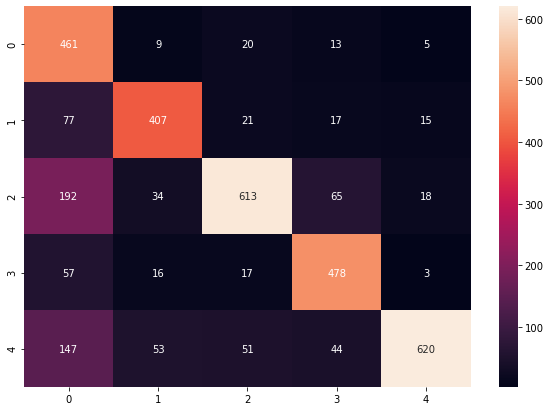

Accuracy Score is: 75.0%
Macroaveraged Recall is: 77.0%
Macroaveraged Precision is: 77.0%
Macroaveraged F1-score 75.0%


In [9]:
predicted_label = model.predict(X_test) #Making the classifier to predict on the previously unseen test data.
accuracy_score = (metrics.accuracy_score(y_test,predicted_label))
accuracy_score = (round(accuracy_score,2))*100
acc_list.append(accuracy_score)

confusion_mat = confusion_matrix(y_test, predicted_label)
class_report = classification_report(y_test, predicted_label)

macro_precision = (metrics.precision_score(y_test, predicted_label, average='macro'))
macro_precision = (round(macro_precision,2))*100
prec_list.append(macro_precision)

macro_recall = (metrics.recall_score(y_test, predicted_label, average='macro'))
macro_recall = (round(macro_recall,2))*100
rec_list.append(macro_recall)
    
macro_f1 = (metrics.f1_score(y_test, predicted_label, average='macro'))
macro_f1 = (round(macro_f1,2))*100
f1_list.append(macro_f1)

print("\n\nConfusion Matrix:")
#print(confusion_mat)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_mat, annot=True, fmt='g')
plt.show()
#print("\nClassification Report for k = {} is:\n".format(k))
#print(class_report)
print("Accuracy Score is: {0}%".format(accuracy_score))
print("Macroaveraged Recall is: {0}%".format(macro_recall))
print("Macroaveraged Precision is: {0}%".format(macro_precision))
print("Macroaveraged F1-score {0}%".format(macro_f1))